## Atlantic Exercise 

By Daniel Elkin

### Contents:
* [I. Notebook preparation](#nb-prep)
* [II. Data preparation](#data-prep)
* [III. Data exploration](#eda)
    * [a. Overview](#overview)
    * [b. Publication hour](#pub-hour)
    * [c. Visit date](#visit-date)
    * [d. Visit hour](#visit-hour)
    * [e. Other variables](#other)
* [IV. Further work](#future)

### I. Notebook preparation <a id="nb-prep"/>

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
def plot_df(df, title, xlab, ylab, kind="bar", ylim=None):
    """
    Helper for the repeated graphing operations below.
    
    Args:
        df - the dataframe to plot
        title - title of the graph
        xlab - label for the x-axis
        ylab - label for the y-axis
        ylim - scale of the y-axis
        
    Returns:
        None
    """

    ax = df.plot(figsize=(10, 5), kind="bar", title=title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
    if ylim:
        ax.set_ylim(ylim)

### II. Data preparation <a id="data-prep" />

Inspect the data file.

In [7]:
data_file = "data/analyst_hw.tsv"

In [8]:
rows = !wc -l < $data_file
rows = int(rows[0])

print(f"There are {rows} rows. The first of which is: \n")
!head -1 $data_file

There are 2001879 rows. The first of which is: 

visitor_id visit_date visit_hour url_id site_section publication_date publication_hour


Create a dataframe from the data, skipping malformed rows and converting the date columns to datetimes.

In [9]:
df = pd.read_csv("data/analyst_hw.tsv",
                     delim_whitespace=True,
                     error_bad_lines=False,
                     header=0, 
                     parse_dates=["visit_date", "publication_date"])


b'Skipping line 249069: expected 7 fields, saw 16\n'
b'Skipping line 626179: expected 7 fields, saw 9\n'
b'Skipping line 1133126: expected 7 fields, saw 22\n'
b'Skipping line 1198292: expected 7 fields, saw 13\nSkipping line 1286414: expected 7 fields, saw 28\n'
b'Skipping line 1783537: expected 7 fields, saw 33\n'
b'Skipping line 1975238: expected 7 fields, saw 17\n'


Inspect the dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001871 entries, 0 to 2001870
Data columns (total 7 columns):
visitor_id          object
visit_date          datetime64[ns]
visit_hour          int64
url_id              object
site_section        object
publication_date    datetime64[ns]
publication_hour    int64
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 106.9+ MB


In [11]:
df.head()

,visitor_id,visit_date,visit_hour,url_id,site_section,publication_date,publication_hour
0,SNSMrjUkQw/foPv5hRQVpQ==,2018-03-12,17,+VAVDTcwiN39A1wI+AMfAQ==,/technology/,2018-03-12,15
1,7ZmbLaKLEhf0XIVwICyiSA==,2018-03-12,10,2mXxdmD6ysfWw82+9T6OlA==,/business/,2018-02-22,12
2,rGzdTSm1D6K6BEQHOEQ37g==,2018-03-12,17,RJkBuEQLELyj66QjJkg1uA==,/business/,2018-03-11,15
3,3IlL9al+8Gr+ORA5w7oU6Q==,2018-03-12,11,uGrr1+tQEYsPD0t4tJg0rg==,/magazine/,2018-03-06,15
4,sf9ahOgrG7K4yHmnSE/nOg==,2018-03-12,12,uGrr1+tQEYsPD0t4tJg0rg==,/magazine/,2018-03-06,15


The file was parsed correctly and the datetimes were successfully converted. There are over two million rows to analyze.

### III. Data exploration <a id="eda" />

#### a. Overview <a id="overview" />

Inspect the variables.

In [62]:
df.describe(include="all")

,visitor_id,visit_date,visit_hour,url_id,site_section,publication_date,publication_hour
count,2001871,2001871,2.001871e+06,2001871,2001871,2001871,2.001871e+06
unique,810986,31,NaN,84658,736,73,NaN
top,O8VQLMsV3chMxy7IIUNgIQ==,2018-03-13 00:00:00,NaN,uT9bBIVeFPRblAs978g+fQ==,/politics/,2018-02-26 00:00:00,NaN
freq,1084,81236,NaN,274409,316348,350205,NaN
first,NaN,2018-03-01 00:00:00,NaN,NaN,NaN,2018-01-15 00:00:00,NaN
last,NaN,2018-03-31 00:00:00,NaN,NaN,NaN,2018-03-31 00:00:00,NaN
mean,NaN,NaN,1.350084e+01,NaN,NaN,NaN,1.268171e+01
std,NaN,NaN,3.450397e+00,NaN,NaN,NaN,2.556255e+00
min,NaN,NaN,8.000000e+00,NaN,NaN,NaN,4.000000e+00
25%,NaN,NaN,1.100000e+01,NaN,NaN,NaN,1.100000e+01


We see from the _count_s that there is complete data for each variable.

From *first* and *last* of **publication_date** and **visit_date**, we see that there are articles published between mid-January and the end of March 2018 and visitor data for the month of March 2018. These correspond to 84,658 articles and 810,986 visitors.

Looking at *freq* in **site_section**, politics is the most-visited section, but one oddity is the large number of unique sections. Examining the unique values reveals that sections may not have been extracted correctly from pages that were translated. This may be something we would want to cleanup.

In [117]:
df[df["site_section"].str.contains("translate")].site_section.head()

111      /translate_c?depth=1&hl=hi&nv=1&prev=search&ru...
13518    /translate_c?depth=1&hl=es&prev=search&rurl=tr...
34353    /translate_c?depth=1&hl=fr&rurl=translate.goog...
42651    /translate_c?depth=1&hl=fr&prev=search&rurl=tr...
44604    /translate_c?depth=1&hl=zh-CN&ie=UTF8&prev=_t&...
Name: site_section, dtype: object

Let's look quickly at histograms for the numeric columns.

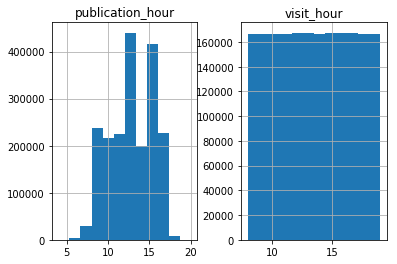

In [132]:
_ = df.hist(bins=12)

We'll just note that the distribution of **visit_hour** is strikingly uniform and inspect these variables in more detail below in order to answer the questions from the prompt.

Before moving on, we'll also create a separate dataframe containing just the unique articles and the number of visits they attracted, which we can use for analysis and modeling below.

In [19]:
article_cols = ["url_id", "site_section", "publication_date", "publication_hour"]
df_arts = df.groupby(article_cols).size().reset_index(name="visits")

df_arts.head()

,url_id,site_section,publication_date,publication_hour,visits
0,+++AhkRNu4R0MmwkftAeXw==,/science/,2018-03-04,10,1
1,++0tQCNyo2HpQJHCY2pWKA==,/technology/,2018-03-03,10,1
2,++4w4143n8MBXWRV6q8zLQ==,/international/,2018-03-08,15,6
3,++5NkYXWL/cVS1hjExX7Gg==,/technology/,2018-03-02,15,4
4,++HHK3FIrORbHbWlicA+MA==,/sponsored/,2018-03-07,11,5


#### b. Publication hour <a id="pub-hour" />

We'll first look at the times of day when articles tend to be published.

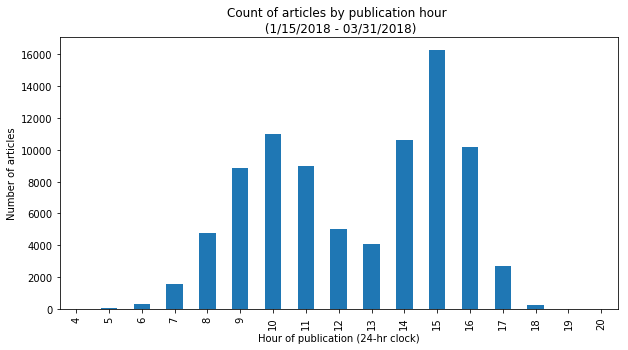

In [145]:
grouped = df_arts.groupby("publication_hour").publication_hour.count()

plot_df(grouped,
        title="Count of articles by publication hour \n (1/15/2018 - 03/31/2018)",
        xlab="Hour of publication (24-hr clock)",
        ylab="Number of articles")

The graph is somewhat bimodal with peaks at 10:00am and 3:00pm and a trough around lunchtime. More articles appear to be published in the afternoon than in the morning.

In [175]:
morning = len(df_arts[df_arts["publication_hour"].between(0, 11, inclusive=True)])
afternoon = len(df_arts[df_arts["publication_hour"].between(12, 23, inclusive=True)])

print(f"Total articles published in the morning: {morning}")
print(f"Total articles published in the afternoon: {afternoon}")

Total articles published in the morning: 35568
Total articles published in the afternoon: 49090


We'll next look at the number of visits by hour of article publication.

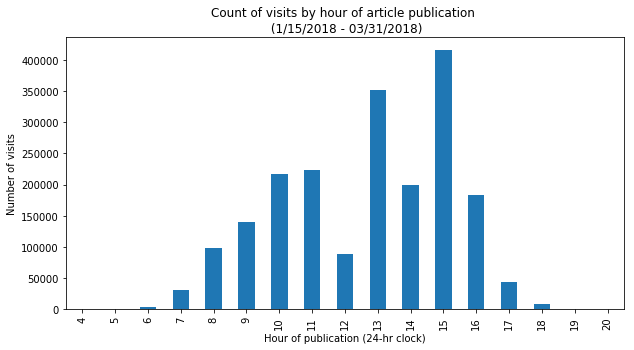

In [173]:
grouped = df.groupby("publication_hour").publication_hour.count()

plot_df(grouped,
        title="Count of visits by hour of article publication \n (1/15/2018 - 03/31/2018)",
        xlab="Hour of publication (24-hr clock)",
        ylab="Number of visits")

Articles published at 1:00pm and 3:00pm attract the most visitors in total. However, as we saw above, 3:00pm is also the time at which most articles are published. Let's also look at average visitors per article by time of publication.

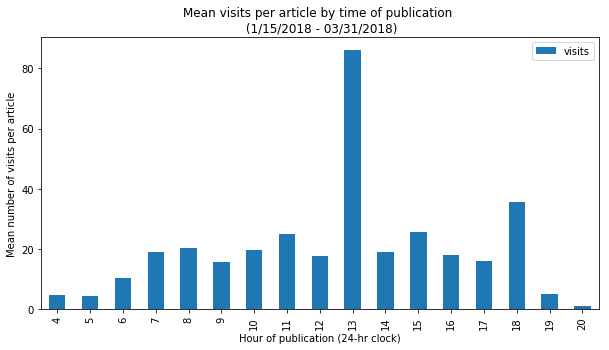

In [42]:
normed = df_arts.groupby("publication_hour").mean()
plot_df(normed,
        title="Mean visits per article by time of publication \n (1/15/2018 - 03/31/2018)",
        xlab="Hour of publication (24-hr clock)",
        ylab="Mean number of visits per article")

We'll leave the analysis here for now. There is a spike for articles published at 1:00pm, but we'll see below that this may be caused by a few unusually popular articles. We will need to do some further analysis and modeling to understand the interaction between publication time and article views. 

#### c. Visit date <a id="visit-date" />

Inspect how the visit rate changes over the course of the month.

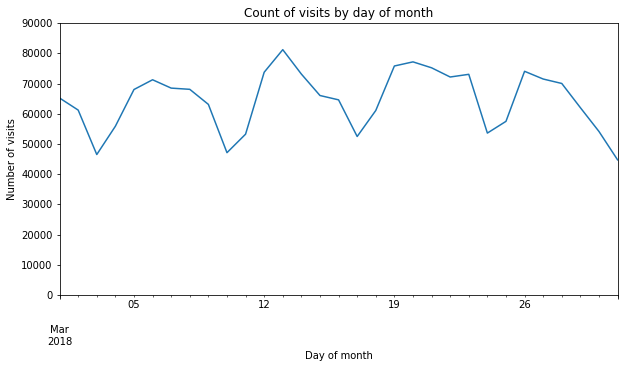

In [192]:
grouped = df.groupby("visit_date").visit_date.count()

plot_df(grouped, 
        title="Count of visits by day of month",
        xlab="Day of month",
        ylab="Number of visits",
        ylim=(0, 90000))

There is some cyclicality visible here, which can probably be attributed to fewer visitors on certain days of the week. Let's see which day of the week correspond to 3/3 and 3/10, which are the first troughs in the graph. 

In [122]:
import calendar, datetime
calendar.day_name[datetime.datetime(2018, 3, 10).weekday()]

'Saturday'

Let's also look at total visits for different days of the week.

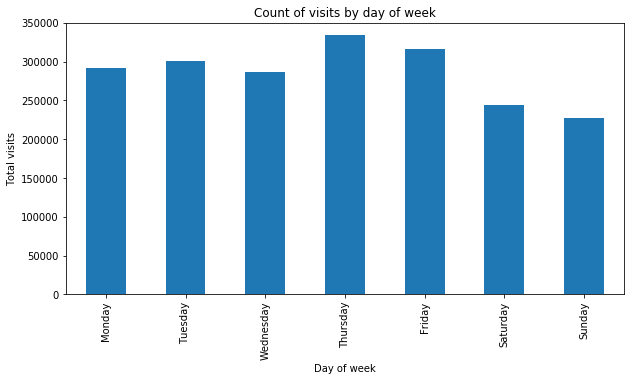

In [129]:
# create a column for the day of the week of the visit
df["publication_day_of_week"] = df.visit_date.dt.day_name()

# group by the day of the week and sort accordingly
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = group_df(df, "publication_day_of_week").reindex(days)

# plot the results
ax = grouped.plot(figsize=(10, 5), 
                  kind="bar", 
                  title="Count of visits by day of week")

ax.set_xlabel("Day of week")
ax.set_ylabel("Total visits")
ax.get_legend().remove()

This graph gives further evidence that there are fewer visits on weekends.

#### d. Visit hour <a id="visit-hour" />

We'll next look at the time of day at which visits occur.

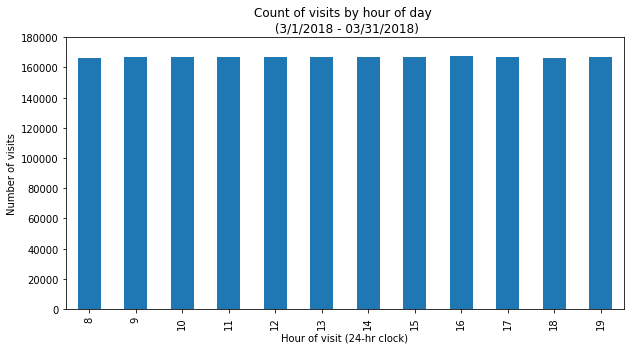

In [65]:
grouped = df.groupby("visit_hour").visit_hour.count()

plot_df(grouped, 
        title="Count of visits by hour of day \n (3/1/2018 - 03/31/2018)",
        xlab="Hour of visit (24-hr clock)",
        ylab="Number of visits",
        ylim=(0, 180000))

This graph is quite surprising. Visits appear to be close to uniformly distributed throughout the day from 8:00am to 9:00pm. We would expect there to be more variability. Let's zoom in to see if there's any movement at all.

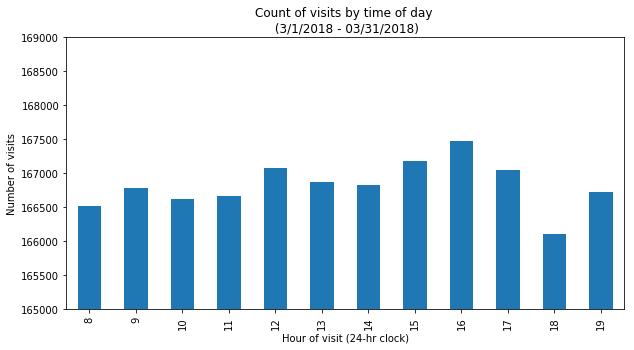

In [66]:
plot_df(grouped, 
        title="Count of visits by time of day \n (3/1/2018 - 03/31/2018)",
        xlab="Hour of visit (24-hr clock)",
        ylab="Number of visits",
        ylim=(165000, 169000))

So we see a change of only about 1,500 visits from the least- to the most-frequently visited times of day. 

Let's look at visits by hour by section of the site to see if there are different distributions by section. Because of the issues with the "site_section" variable noted above, we'll use just the five most popular sections. 

In [134]:
NUM_SITES=5
top_sites = (df
             .groupby("site_section")
             .site_section
             .count()
             .sort_values(ascending=False)[:NUM_SITES])
top_sites

site_section
/politics/         316348
/                  274409
/magazine/         192883
/entertainment/    161599
/health/           129162
Name: site_section, dtype: int64

In [135]:
df_top_sites = df[df["site_section"].isin(
    top_sites.index.get_values())]

len(df_top_sites)

1074401

We now have about half as much data, from sections such as _politics_ and _entertainment_.

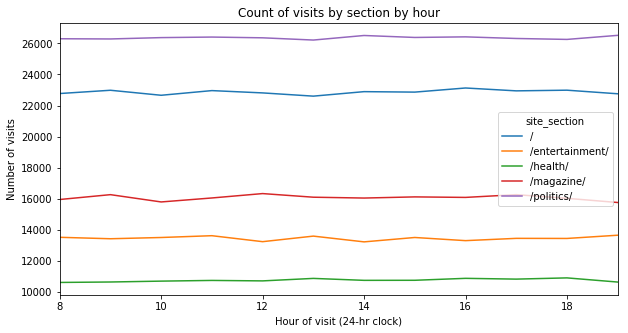

In [138]:
figsize =(10, 5)
title = "Count of visits by section by hour"

ax = (df_top_sites
     .groupby(["site_section", "visit_hour"])
     .visit_hour
     .count()
     .unstack()
     .T
     .plot(figsize=figsize, title=title))

ax.set_xlabel("Hour of visit (24-hr clock)")
_ = ax.set_ylabel("Number of visits")

The number of visits by hour looks to be similar across the most popular sections of the site with little variability.

#### e. Other variables <a id="other" />

In order to explain why the visit rate is so uniform, we'll look at the other variables. For example, perhaps most of the visits happen to be from a bot that hits the site every minute and that can be identified by "visitor_id".

In [292]:
(df
 .groupby("visitor_id")
 .visitor_id
 .count()
 .sort_values(ascending=False)[:10])

visitor_id
O8VQLMsV3chMxy7IIUNgIQ==    1084
MTvOBYs7APNysuFmFNkmnw==     771
l3S6vLosmMb1TizktARkgQ==     652
BRdO+h6dildjjEQcpTnrUw==     619
VYT+YwGPqmqV/TwbSOo8pA==     608
CDB9zVAqvHT+/jEJgkHR2A==     588
8x6HEIJduV8yJJ/rYWQvlw==     581
94s0HBqO0OSgiE61PuUTjQ==     553
4jQMRpYLcY9Y7tfTRJY9iA==     534
U0n9+VEOVBbO3CHwEaYn2w==     514
Name: visitor_id, dtype: int64

The counts for "visitor_id" do not tell us much. We cannot identify any users that are accounting for the majority of visits. Let's also look at the "url_id".

In [294]:
(df
 .groupby("url_id")
 .url_id
 .count()
 .sort_values(ascending=False)[:10])

url_id
uT9bBIVeFPRblAs978g+fQ==    274409
IuXaKC7+qw6rG0cFbB4rNA==     48713
uGrr1+tQEYsPD0t4tJg0rg==     34360
52SRjAfHy+aJM38iGxX/ag==     13956
48Gtp8joeNWBKIePUgp/ng==     13263
R41RAvVrziLi8M6Wi0kk0A==     12775
HS+VgYmeFPepUqBuU+zg/A==     12396
YQuZMKM41R5i+EgfXc1X3A==     11479
HlLULhSr7eCaG/w8k2/vow==     11179
qeZDUs7n+KrmPk57NNzrrg==      9830
Name: url_id, dtype: int64

The counts for the "url_id" also do not shed much light on the uniformity of visit rates. There are a few unusually popular URLs (possibly corresponding to the homepage), but it is hard to see how these would explain the visit rate seen above.

### IV. Conclusions and further work <a id="future" />

In this analysis, we saw that the most popular time of day for publishing articles at the Atlantic is between 3:00pm and 4:00pm, and the second-most popular time is between 10:00am and 11:00am.

Articles are most often viewed on Thursdays and least often viewed over the weekend.

Surprisingly, there is no time of day that is more popular than others for viewing articles.

As next steps in the analysis, we would be interested in looking at the relationship between when an article is published and when it tends to be viewed and to try to model the view count for an article given information such as publication hour, day of week and site section.

Below we sketch the beginnings of a naive regression for predicting visits from publication hour.

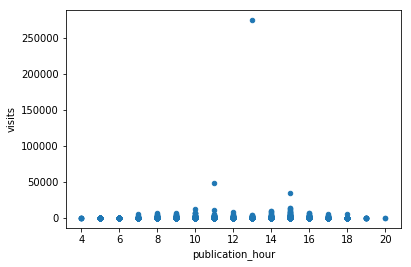

In [219]:
# note the outliers, especially at 13:00
_ = df_arts.plot(x="publication_hour", y="visits", kind="scatter")

In [250]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

X, y = df_arts[["publication_hour"]], df_arts["visits"]

# treat hour as categorical here
# we would want to transform it in the future:
# https://stats.stackexchange.com/q/148380
enc = OneHotEncoder(categories="auto")
X_encoded = enc.fit_transform(X)

# fit the model
lm = LinearRegression().fit(X_encoded, y)

# get the index of the highest coefficient and offset by the minimum hour (4:00) 
best_hour = np.argmax(lm.coef_) + min(X["publication_hour"])

print(f"Publishing a story at {best_hour}:00 will attract the most views!")

Publishing a story at 13:00 will attract the most views!
